In [4]:
# importing the initial dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.max_open_warning'] = 40

In [5]:
# reading the data
data = pd.read_csv('rainfall-in-india-1901-2015.csv')
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [6]:
print(data['YEAR'].min(),data['YEAR'].max())

1901 2015


In [7]:
# finding unique sub-divisions, to do sub-division-wise anomaly detecion
x = data['SUBDIVISION'].unique()
print(x, len(x))

['ANDAMAN & NICOBAR ISLANDS' 'ARUNACHAL PRADESH' 'ASSAM & MEGHALAYA'
 'NAGA MANI MIZO TRIPURA' 'SUB HIMALAYAN WEST BENGAL & SIKKIM'
 'GANGETIC WEST BENGAL' 'ORISSA' 'JHARKHAND' 'BIHAR' 'EAST UTTAR PRADESH'
 'WEST UTTAR PRADESH' 'UTTARAKHAND' 'HARYANA DELHI & CHANDIGARH' 'PUNJAB'
 'HIMACHAL PRADESH' 'JAMMU & KASHMIR' 'WEST RAJASTHAN' 'EAST RAJASTHAN'
 'WEST MADHYA PRADESH' 'EAST MADHYA PRADESH' 'GUJARAT REGION'
 'SAURASHTRA & KUTCH' 'KONKAN & GOA' 'MADHYA MAHARASHTRA' 'MATATHWADA'
 'VIDARBHA' 'CHHATTISGARH' 'COASTAL ANDHRA PRADESH' 'TELANGANA'
 'RAYALSEEMA' 'TAMIL NADU' 'COASTAL KARNATAKA' 'NORTH INTERIOR KARNATAKA'
 'SOUTH INTERIOR KARNATAKA' 'KERALA' 'LAKSHADWEEP'] 36


In [8]:
col = [i for i in data.columns if i not in ['SUBDIVISION','YEAR', 'ANNUAL']]
data = data.drop(col, axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 3 columns):
SUBDIVISION    4116 non-null object
YEAR           4116 non-null int64
ANNUAL         4090 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 96.5+ KB


In [9]:
# handling null/NaN values, using median for the same, it is outlier independent
data['ANNUAL'] = data['ANNUAL'].fillna(data['ANNUAL'].median())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 3 columns):
SUBDIVISION    4116 non-null object
YEAR           4116 non-null int64
ANNUAL         4116 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 96.5+ KB


SUBDIVISION
ANDAMAN & NICOBAR ISLANDS             AxesSubplot(0.125,0.125;0.775x0.755)
ARUNACHAL PRADESH                     AxesSubplot(0.125,0.125;0.775x0.755)
ASSAM & MEGHALAYA                     AxesSubplot(0.125,0.125;0.775x0.755)
BIHAR                                 AxesSubplot(0.125,0.125;0.775x0.755)
CHHATTISGARH                          AxesSubplot(0.125,0.125;0.775x0.755)
COASTAL ANDHRA PRADESH                AxesSubplot(0.125,0.125;0.775x0.755)
COASTAL KARNATAKA                     AxesSubplot(0.125,0.125;0.775x0.755)
EAST MADHYA PRADESH                   AxesSubplot(0.125,0.125;0.775x0.755)
EAST RAJASTHAN                        AxesSubplot(0.125,0.125;0.775x0.755)
EAST UTTAR PRADESH                    AxesSubplot(0.125,0.125;0.775x0.755)
GANGETIC WEST BENGAL                  AxesSubplot(0.125,0.125;0.775x0.755)
GUJARAT REGION                        AxesSubplot(0.125,0.125;0.775x0.755)
HARYANA DELHI & CHANDIGARH            AxesSubplot(0.125,0.125;0.775x0.755)
HIMACHAL PRAD

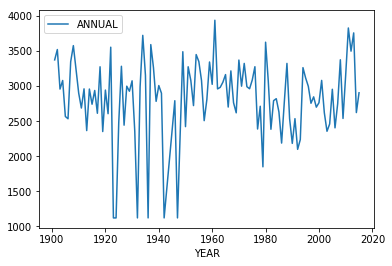

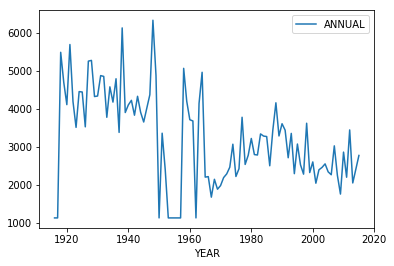

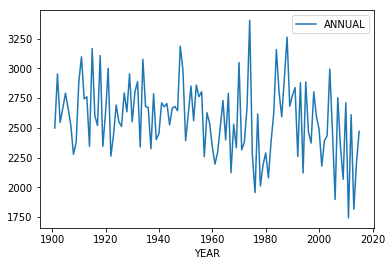

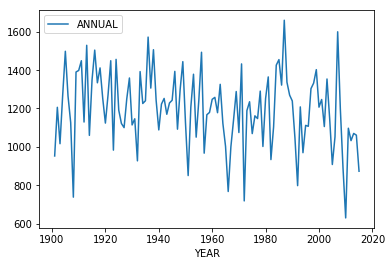

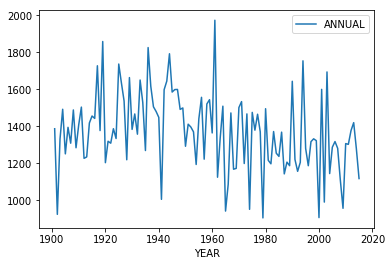

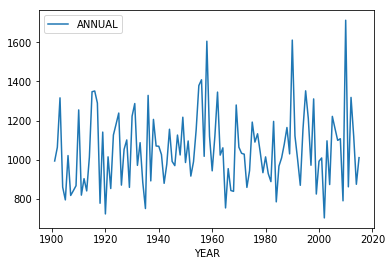

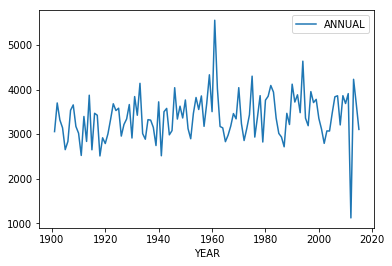

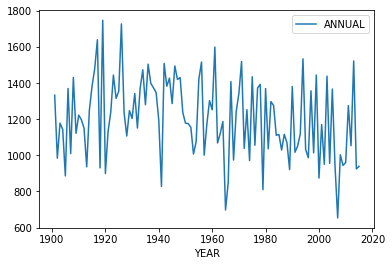

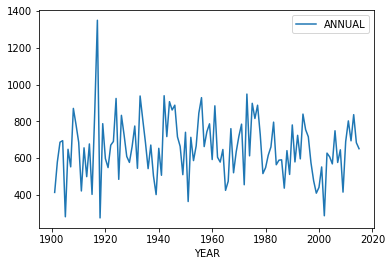

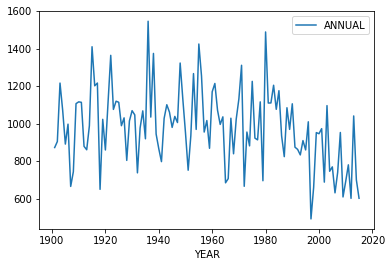

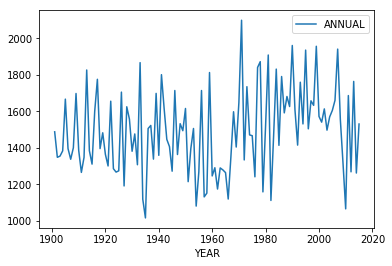

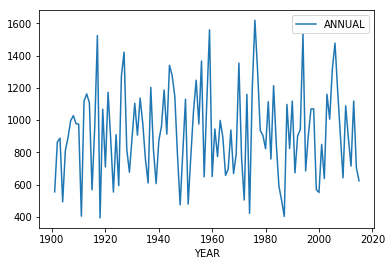

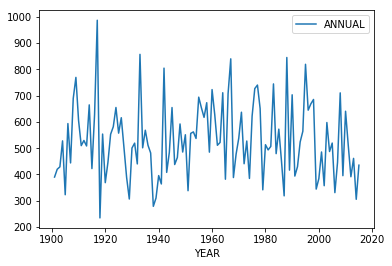

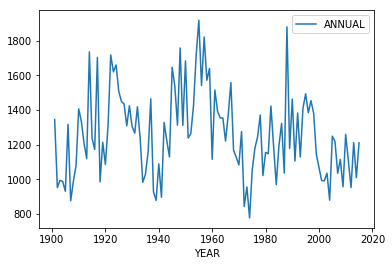

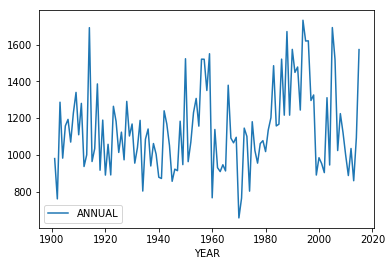

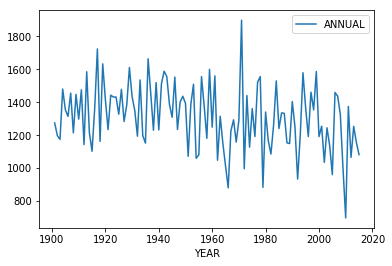

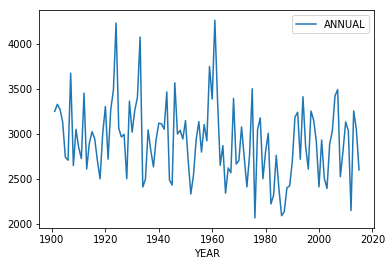

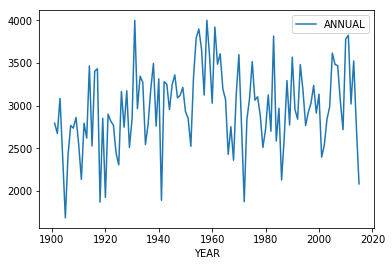

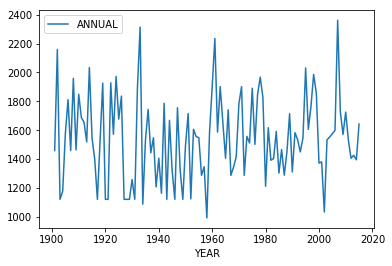

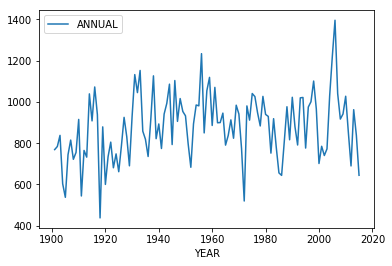

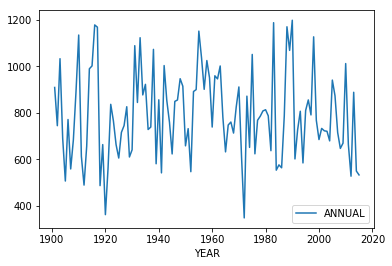

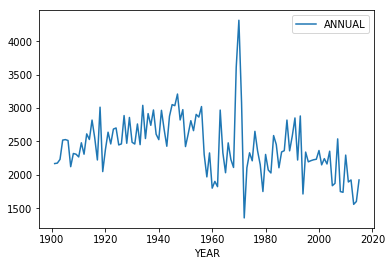

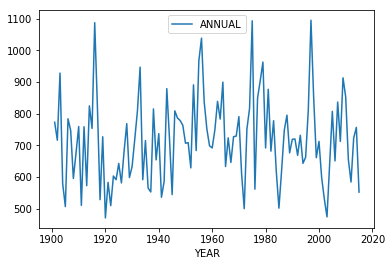

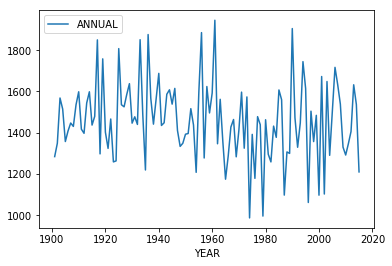

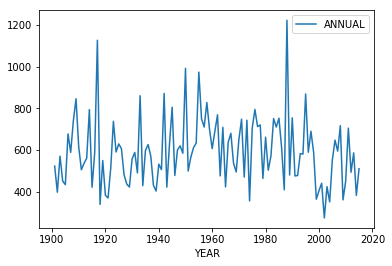

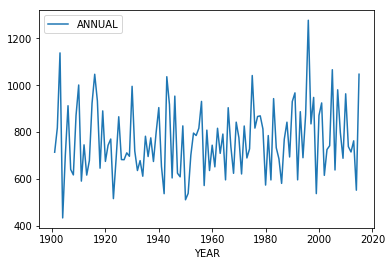

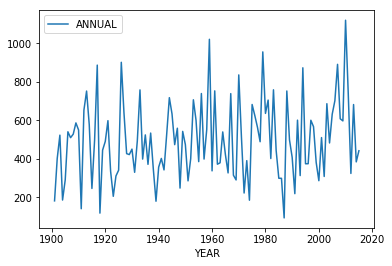

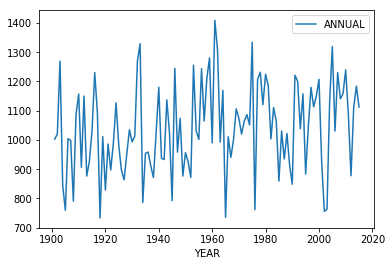

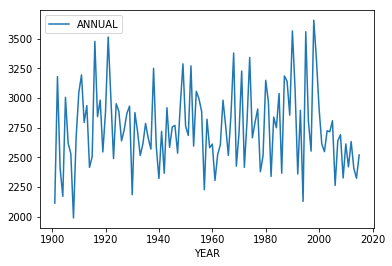

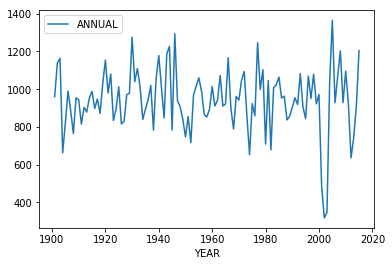

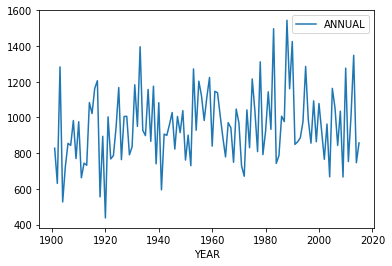

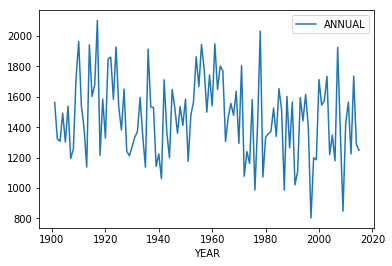

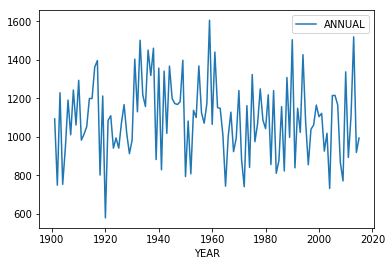

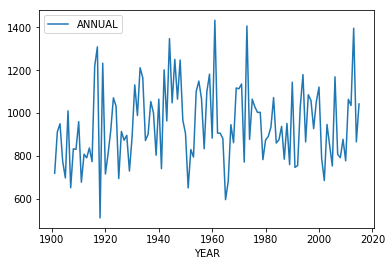

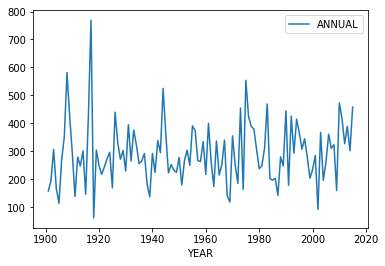

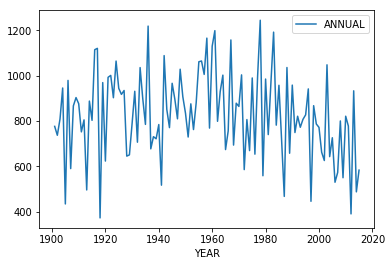

In [7]:
# visualising the weather trend for each sub-division
data.groupby(['SUBDIVISION']).plot(x='YEAR',y='ANNUAL')

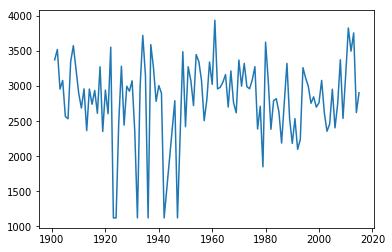

In [12]:
# checking one plot manually, for 'ANDAMAN & NICOBAR ISLANDS'
sample = data[data['SUBDIVISION'] == 'ANDAMAN & NICOBAR ISLANDS']
plt.plot(sample.YEAR, sample.ANNUAL)

In [13]:
print(sample.info())
sample.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110 entries, 0 to 109
Data columns (total 3 columns):
SUBDIVISION    110 non-null object
YEAR           110 non-null int64
ANNUAL         110 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.4+ KB
None


,SUBDIVISION,YEAR,ANNUAL
0,ANDAMAN & NICOBAR ISLANDS,1901,3373.2
1,ANDAMAN & NICOBAR ISLANDS,1902,3520.7
2,ANDAMAN & NICOBAR ISLANDS,1903,2957.4
3,ANDAMAN & NICOBAR ISLANDS,1904,3079.6
4,ANDAMAN & NICOBAR ISLANDS,1905,2566.7


In [29]:
sample.index = sample.YEAR
sample.head()

,SUBDIVISION,YEAR,ANNUAL
YEAR,,,
1901,ANDAMAN & NICOBAR ISLANDS,1901,3373.2
1902,ANDAMAN & NICOBAR ISLANDS,1902,3520.7
1903,ANDAMAN & NICOBAR ISLANDS,1903,2957.4
1904,ANDAMAN & NICOBAR ISLANDS,1904,3079.6
1905,ANDAMAN & NICOBAR ISLANDS,1905,2566.7


# Method: Moving Average Using Discrete Linear Convolution

In [32]:
from __future__ import division
from itertools import count
import matplotlib.pyplot as plt
from numpy import linspace, loadtxt, ones, convolve
import numpy as np
import pandas as pd
import collections
from random import randint
from matplotlib import style
style.use('fivethirtyeight')
%matplotlib inline

In [53]:
def moving_average(data, window_size):
    """ Computes moving average using discrete linear convolution of two one dimensional sequences.
    Args:
    -----
            data (pandas.Series): independent variable
            window_size (int): rolling window size

    Returns:
    --------
            ndarray of linear convolution
    """

    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(data, window, 'same')


def explain_anomalies(y, window_size, sigma=1.0):
    """ Helps in exploring the anamolies using stationary standard deviation
    Args:
    -----
        y (pandas.Series): independent variable
        window_size (int): rolling window size
        sigma (int): value for standard deviation

    Returns:
    --------
        a dict (dict of 'standard_deviation': int, 'anomalies_dict': (index: value))
        containing information about the points indentified as anomalies

    """
    avg = moving_average(y, window_size).tolist()
    residual = y - avg
    # Calculate the variation in the distribution of the residual
    std = np.std(residual)
    index_val = list(y.index)
    return {'standard_deviation': round(std, 3),
            'anomalies_dict': collections.OrderedDict([(index, y_i) for index, y_i, avg_i in zip(index_val, y, avg)
              if (y_i > avg_i + (sigma*std)) | (y_i < avg_i - (sigma*std))])}


def explain_anomalies_rolling_std(y, window_size, sigma=1.0):
    """ Helps in exploring the anamolies using rolling standard deviation
    Args:
    -----
        y (pandas.Series): independent variable
        window_size (int): rolling window size
        sigma (int): value for standard deviation

    Returns:
    --------
        a dict (dict of 'standard_deviation': int, 'anomalies_dict': (index: value))
        containing information about the points indentified as anomalies
    """
    avg = moving_average(y, window_size)
    avg_list = avg.tolist()
    residual = y - avg
    # Calculate the variation in the distribution of the residual
    testing_std = pd.rolling_std(residual, window_size)
    testing_std_as_df = pd.DataFrame(testing_std)
    rolling_std = testing_std_as_df.replace(np.nan, testing_std_as_df.ix[window_size - 1]).round(3).iloc[:,0].tolist()
    std = np.std(residual)
    index_val = list(y.index)
    return {'stationary standard_deviation': round(std, 3),
            'anomalies_dict': collections.OrderedDict([(index, y_i) for index, y_i, avg_i, rs_i in zip(index_val,
            y, avg_list, rolling_std) if (y_i > avg_i + (sigma * rs_i)) | (y_i < avg_i - (sigma * rs_i))])}


# This function is repsonsible for displaying how the function performs on the given dataset.
def plot_results(x, y, window_size, sigma_value=1, text_xlabel="X Axis", text_ylabel="Y Axis", applying_rolling_std=False):
    """ Helps in generating the plot and flagging the anamolies. Supports both moving and stationary standard deviation. Use the 'applying_rolling_std' to switch
        between the two.
    Args:
    -----
        x (pandas.Series): dependent variable
        y (pandas.Series): independent variable
        window_size (int): rolling window size
        sigma_value (int): value for standard deviation
        text_xlabel (str): label for annotating the X Axis
        text_ylabel (str): label for annotatin the Y Axis
        applying_rolling_std (boolean): True/False for using rolling vs stationary standard deviation
    """
    plt.figure(figsize=(15, 8))
    plt.plot(x, y, "k.")
    y_av = moving_average(y, window_size)
    plt.plot(x, y_av, color='green')
    plt.xlabel(text_xlabel)
    plt.ylabel(text_ylabel)

    # Query for the anomalies and plot the same
    events = {}
    if applying_rolling_std:
        events = explain_anomalies_rolling_std(y, window_size=window_size, sigma=sigma_value)
    else:
        events = explain_anomalies(y, window_size=window_size, sigma=sigma_value)

    x_anomaly = np.fromiter(events['anomalies_dict'].keys(), dtype=int, count=len(events['anomalies_dict']))
    y_anomaly = np.fromiter(events['anomalies_dict'].values(), dtype=float, count=len(events['anomalies_dict']))

    plt.plot(x_anomaly, y_anomaly, "r*", markersize=12)

    # add grid and lines and enable the plot
    plt.grid(True)
    plt.show()

In [54]:
# just checking it for 'ANDMAN & NICOBAR ISLANDS'
x = sample['YEAR']
y = sample['ANNUAL']
y.head()

YEAR
1901    3373.2
1902    3520.7
1903    2957.4
1904    3079.6
1905    2566.7
Name: ANNUAL, dtype: float64

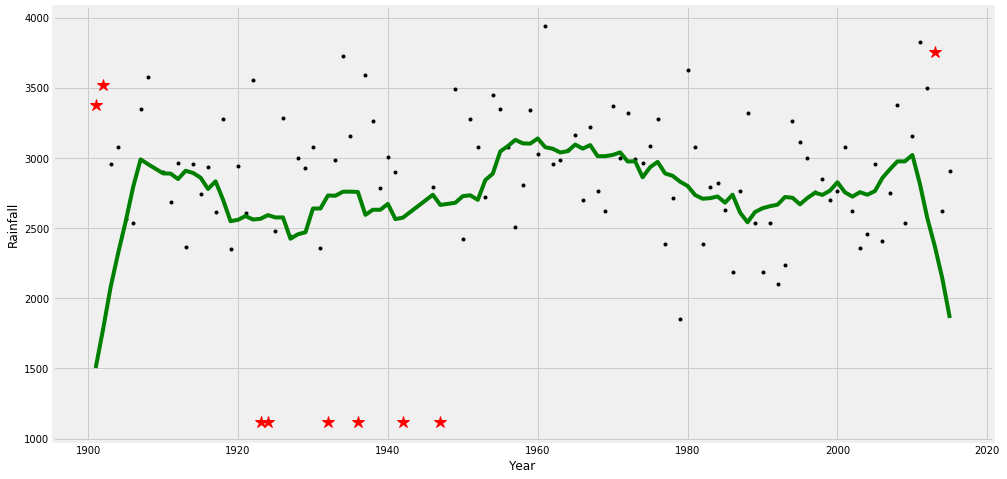

Information about the anomalies model:{'standard_deviation': 617.225, 'anomalies_dict': OrderedDict([(1901, 3373.2), (1902, 3520.7), (1923, 1121.3), (1924, 1121.3), (1932, 1121.3), (1936, 1121.3), (1942, 1121.3), (1947, 1121.3), (2013, 3757.8)])}


In [58]:
# plot the results
plot_results(x, y=y, window_size=12, text_xlabel="Year", sigma_value=2, text_ylabel="Rainfall")
events = explain_anomalies(y, window_size=12, sigma=2)

# Display the anomaly dict
print("Information about the anomalies model:{}".format(events))

# Generalizing the solution: Sub-station-wise

In [30]:
# dividing the data into train and test sets
train = sample[sample['YEAR']<2000] # using first 100 years data for training
print(train.head())
test = sample[sample['YEAR']>1999] # using next 15 yeara data for testing
print(test.head())

# Note: Ignoring the missing years in train and test set, as our model is independent of continuity of data interval

                    SUBDIVISION  YEAR  ANNUAL
YEAR                                         
1901  ANDAMAN & NICOBAR ISLANDS  1901  3373.2
1902  ANDAMAN & NICOBAR ISLANDS  1902  3520.7
1903  ANDAMAN & NICOBAR ISLANDS  1903  2957.4
1904  ANDAMAN & NICOBAR ISLANDS  1904  3079.6
1905  ANDAMAN & NICOBAR ISLANDS  1905  2566.7
                    SUBDIVISION  YEAR  ANNUAL
YEAR                                         
2000  ANDAMAN & NICOBAR ISLANDS  2000  2763.2
2001  ANDAMAN & NICOBAR ISLANDS  2001  3080.9
2002  ANDAMAN & NICOBAR ISLANDS  2002  2620.2
2003  ANDAMAN & NICOBAR ISLANDS  2003  2355.9
2004  ANDAMAN & NICOBAR ISLANDS  2004  2460.1


In [31]:
# train['YEAR_Timestamp'] = train['YEAR'].map(lambda x: pd.Timestamp(str(x)))
# test['YEAR_Timestamp'] = test['YEAR'].map(lambda x: pd.Timestamp(str(x)))
# train.index = pd.DatetimeIndex(train['YEAR_Timestamp'])
# print(train.head())
# test.index = pd.DatetimeIndex(test['YEAR_Timestamp'])
# print(test.head())

train.index = pd.DatetimeIndex(train['YEAR'].map(lambda x: pd.Timestamp(str(x))))
print(train.head())
test.index = pd.DatetimeIndex(test['YEAR'].map(lambda x: pd.Timestamp(str(x))))
print(test.head())

                          SUBDIVISION  YEAR  ANNUAL
YEAR                                               
1901-01-01  ANDAMAN & NICOBAR ISLANDS  1901  3373.2
1902-01-01  ANDAMAN & NICOBAR ISLANDS  1902  3520.7
1903-01-01  ANDAMAN & NICOBAR ISLANDS  1903  2957.4
1904-01-01  ANDAMAN & NICOBAR ISLANDS  1904  3079.6
1905-01-01  ANDAMAN & NICOBAR ISLANDS  1905  2566.7
                          SUBDIVISION  YEAR  ANNUAL
YEAR                                               
2000-01-01  ANDAMAN & NICOBAR ISLANDS  2000  2763.2
2001-01-01  ANDAMAN & NICOBAR ISLANDS  2001  3080.9
2002-01-01  ANDAMAN & NICOBAR ISLANDS  2002  2620.2
2003-01-01  ANDAMAN & NICOBAR ISLANDS  2003  2355.9
2004-01-01  ANDAMAN & NICOBAR ISLANDS  2004  2460.1


In [ ]:
# making the solution general, for every sub-station-wise

def find_anomaly(data=data, sub_division='ANDAMAN & NICOBAR ISLANDS', allowed_deviation=25):
    sub_data = data[data['SUBDIVISION'] == sub_division]
    train = sub_data[sub_data['YEAR']<2000]
    test = sub_data[sub_data['YEAR']>1999]
    

# find_anomaly()